# Random Forest example

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)

## Problem: Adult Data set

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")
df.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.drop(columns=['Workclass', 'Occupation', 'Country'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Martial_Status  32561 non-null  object
 5   Relationship    32561 non-null  object
 6   Race            32561 non-null  object
 7   Sex             32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_per_week  32561 non-null  int64 
 11  Target          32561 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [6]:
df['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df['TargetNew'] = df['Target'].map({' <=50K':0, ' >50K':1 })
df

,Age,fnlwgt,Education,Education_Num,Martial_Status,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Target,TargetNew
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K,0
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K,0
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K,0
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K,0
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,0,38,<=50K,0
32557,40,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,>50K,1
32558,58,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,0,40,<=50K,0
32559,22,201490,HS-grad,9,Never-married,Own-child,White,Male,0,0,20,<=50K,0


In [16]:
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier

featureNames = ['Age', 'Education_Num','Hours_per_week']

x = np.array(df[featureNames])
y = np.array(df['TargetNew'])


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)



In [20]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
y_train_predict = forest.predict(x_train)

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
confusion_matrix(y_train,y_train_predict)

array([[18712,  1112],
       [ 2787,  3437]], dtype=int64)

In [25]:
accuracy_score(y_train,y_train_predict)

0.8503148034398035

In [26]:
# validation data
y_test_predict = forest.predict(x_test)
accuracy_score(y_test,y_test_predict)


0.769998464609243

# Parameter tuning with Sklearn

In [29]:
from sklearn.model_selection import GridSearchCV

#max_depth=None,
min_samples_split=[2,4,8],
min_samples_leaf=[7,14],

param_grid = {'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf }

dt = RandomForestClassifier()
gs = GridSearchCV(estimator=dt, param_grid=param_grid)
result = gs.fit(x_train,y_train)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sneh.lata\Anaconda3\envs\randomForest\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sneh.lata\Anaconda3\envs\randomForest\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\sneh.lata\Anaconda3\envs\randomForest\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sneh.lata\Anaconda3\envs\randomForest\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'min_samples_leaf' parameter of RandomForestClassifier must be an int in the range [1, inf) or a float in the range (0.0, 1.0). Got [7, 14] instead.


In [95]:
#see results details
gs.cv_results_

{'mean_fit_time': array([0.01665359, 0.01043415, 0.01076336, 0.01051855, 0.01077938,
        0.00740933, 0.01020331, 0.010115  , 0.01139741, 0.01106901,
        0.00799441, 0.0100172 , 0.01032076, 0.01146455, 0.01048207]),
 'std_fit_time': array([0.00608787, 0.00143099, 0.00123248, 0.00104153, 0.00074699,
        0.00080206, 0.00147898, 0.00102573, 0.00184552, 0.00211052,
        0.00109601, 0.00128223, 0.001358  , 0.00109565, 0.0004266 ]),
 'mean_score_time': array([0.0044035 , 0.00100546, 0.00119963, 0.0012032 , 0.00120645,
        0.00110703, 0.0015934 , 0.00100055, 0.00140333, 0.00152087,
        0.00110693, 0.00140252, 0.00141358, 0.0012845 , 0.00122004]),
 'std_score_time': array([2.25292055e-03, 1.90376900e-06, 3.89863314e-04, 3.97850008e-04,
        3.96002434e-04, 2.03677765e-04, 1.19004907e-03, 4.48226929e-06,
        4.89522220e-04, 4.89428990e-04, 2.01617408e-04, 4.88600975e-04,
        4.79950943e-04, 5.48481112e-04, 4.00924399e-04]),
 'param_max_depth': masked_array(data=

In [96]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=40,
                       min_impurity_decrease=0.0001)

In [97]:
y_predict = gs.predict(x)
accuracy_score(y,y_predict)

0.8027087620159086

[Text(0.4725, 0.9444444444444444, 'x[1] <= 12.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(0.2275, 0.8333333333333334, 'x[0] <= 33.5\ngini = 0.27\nsamples = 24494\nvalue = [20562, 3932]'),
 Text(0.09, 0.7222222222222222, 'x[0] <= 26.5\ngini = 0.11\nsamples = 10653\nvalue = [10031, 622]'),
 Text(0.04, 0.6111111111111112, 'x[0] <= 23.5\ngini = 0.035\nsamples = 6238\nvalue = [6128, 110]'),
 Text(0.02, 0.5, 'gini = 0.01\nsamples = 4483\nvalue = [4460, 23]'),
 Text(0.06, 0.5, 'gini = 0.094\nsamples = 1755\nvalue = [1668, 87]'),
 Text(0.14, 0.6111111111111112, 'x[2] <= 49.5\ngini = 0.205\nsamples = 4415\nvalue = [3903, 512]'),
 Text(0.1, 0.5, 'x[1] <= 8.5\ngini = 0.173\nsamples = 3582\nvalue = [3240, 342]'),
 Text(0.08, 0.3888888888888889, 'gini = 0.055\nsamples = 533\nvalue = [518, 15]'),
 Text(0.12, 0.3888888888888889, 'gini = 0.191\nsamples = 3049\nvalue = [2722, 327]'),
 Text(0.18, 0.5, 'x[0] <= 29.5\ngini = 0.325\nsamples = 833\nvalue = [663, 170]'),
 Text(0.16, 0.38

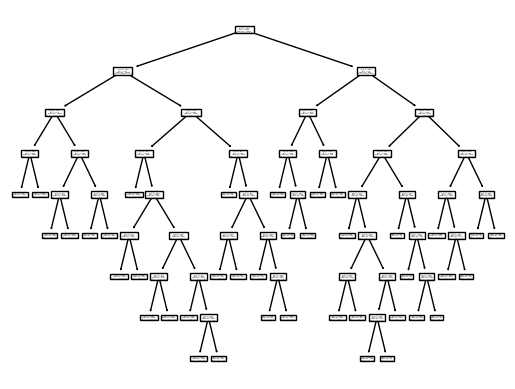

In [98]:
tree.plot_tree(gs.best_estimator_)